I forhold til utdyping av forklaring av kode, samt valg av metodik så legger jeg en markdown seksjon under den akkutelle kode seksjonen, i noen tillfeller vil jeg legge denne forklarende seksjonen slik at den forklarer flere ovenforliggende kode seksjoner der hvor det er mest hensiksmessig.

In [33]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, ConfusionMatrixDisplay , RocCurveDisplay

In [4]:
raw_df = pd.read_csv("../Oblig1/wdbc.data", header=None)
raw_df.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
raw_df.describe()

,0,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [5]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       569 non-null    int64  
 1   1       569 non-null    object 
 2   2       569 non-null    float64
 3   3       569 non-null    float64
 4   4       569 non-null    float64
 5   5       569 non-null    float64
 6   6       569 non-null    float64
 7   7       569 non-null    float64
 8   8       569 non-null    float64
 9   9       569 non-null    float64
 10  10      569 non-null    float64
 11  11      569 non-null    float64
 12  12      569 non-null    float64
 13  13      569 non-null    float64
 14  14      569 non-null    float64
 15  15      569 non-null    float64
 16  16      569 non-null    float64
 17  17      569 non-null    float64
 18  18      569 non-null    float64
 19  19      569 non-null    float64
 20  20      569 non-null    float64
 21  21      569 non-null    float64
 22  22

Ut i fra beskrivelsen til datasetet er hensikten å analysere forskjellige features for for å se om vi kan lage en modell predikere om en sulst er malignant (M) eller benign (B). Datasetet består av en id kollone (index 0), en target verdi (index 1) som enten er M eller B og de resterende kollonene er features. Alle features verdiene ser ut til å være normalfordelte float verdier. Det vil derfor være hensiktsmessig å bruke stratified sampling på dette datasette slik at vi oppnår en tilnærmet lik fordeling for target variablen mellom de forskjellige datasettene vi deler opp i. Videre vil det være hensikts messig å bruke en naive bayes modell for normalfordelte data og jeg kommer derfor til å bruke GaussianNB for naive bayes delen av analysen.

In [5]:
df = raw_df.copy()
df["target"] = np.where(df[1] == "M", 1, 0)
df = df.drop([0,1], axis=1)
df.head()

,2,3,4,5,6,7,8,9,10,11,...,23,24,25,26,27,28,29,30,31,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


Før vi bruker datasete videre må vi konvertere verdiene i target kollonen slik at disse kan brukes med de verktøyene vi ønsker å bruke. Jeg har gjort dette ved å bruke numpy.where() fuksjonen til å konvertere verdien M til 1 og B til 0 [1]. Videre har jeg lagt disse verdiene i en ny kollone "target", slik at det letter kan brukes generelle funksjoner for splitting av datasetet. Siden verdiene for ID kollonen og den gamle kollonen for target verdiene ikke har noe videre nytteverdi, så dropper vi disse fra datasetet.

ref:
[1]: Geeks for Geeks. (2025, 11. juli) numpy.where() in Python. Hentet 14. september 2025 fra "https://www.geeksforgeeks.org/numpy/numpy-where-in-python/"

In [6]:
# funksjon for splitting av dataset i train, validate og test
def split_dataset(data):
    train_val = data.groupby("target", group_keys=False)[data.columns].sample(frac=0.8)
    test = data.drop(train_val.index)
    train = train_val.groupby("target", group_keys=False)[train_val.columns].sample(frac=0.75)
    validation = train_val.drop(train.index)    
    return [train, validation, test]

# hjelpe funksjon for å validere av jevn fordeling av dataset på target verdi
def check_split_dataset(data):
    print(data[0]["target"].value_counts()/data[0].shape[0])
    print(data[1]["target"].value_counts()/data[1].shape[0])
    print(data[2]["target"].value_counts()/data[2].shape[0])

# funksjon for å dele opp i targets og features
def split_targets_and_features(data):
    targets = data.target
    features = data.drop("target", axis=1)
    return [targets, features]

# hjelpe funksjon for oppdeling i features og targets
def create_set_of_targets_and_features(data):
    train = split_targets_and_features(data[0])
    validation = split_targets_and_features(data[1])
    test = split_targets_and_features(data[2])

    return [train, validation, test]

# funksjon for spliting av dataset
def create_full_dataset(input):
    data = split_dataset(input)
    dataset = create_set_of_targets_and_features(data)

    return dataset

In [13]:
test_dataset = split_dataset(df)
check_split_dataset(test_dataset)
print('**********')
print(test_dataset[0].shape[0]/df.target.shape[0])
print(test_dataset[1].shape[0]/df.target.shape[0])
print(test_dataset[2].shape[0]/df.target.shape[0])

target
0    0.625731
1    0.374269
Name: count, dtype: float64
target
0    0.631579
1    0.368421
Name: count, dtype: float64
target
0    0.628319
1    0.371681
Name: count, dtype: float64
**********
0.6010544815465729
0.20035149384885764
0.19859402460456943


Som nevn tidligere jeg har valgt å bruke stratified sampling med grupering på target kollonen slik at det oppnås en tilnærmet lik fordeling for utfallet av target hendelsen mellom de forskjellige delene av datasetet. Videre har jeg delt opp datasetet i 60, 20, 20 % split for henholdsvis training, validation og testing, slik at jeg får en god fordeling mellom dataene for trening, validering og testing. Ut ifra størelsen på datasette og typen target variabel det inneholder mener jeg dette gir en grei balanse mellom nok data til trening av modellen, men samtidig en god mengde data til opptimalisering og testing av modellen.

In [65]:
# hjelpe fuksjon for vurdering av modellene        
def evaluate_model(classifier, features, targets):
    predictions = classifier.predict(features)
    accuracy = accuracy_score(targets, predictions)
    precision = precision_score(targets, predictions)
    recall = recall_score(targets, predictions)
    f1 = f1_score(targets, predictions)
    roc_auc = roc_auc_score(targets, predictions)   

    return [accuracy, precision, recall, f1, roc_auc]

# hjelpe funksjon for å legg til verdier i resultat array i validate og test funksjonen 
def append_values(results, accuracy, precision, recall, f1, roc_auc):
        accuracy.append(results[0])
        precision.append(results[1])
        recall.append(results[2])
        f1.append(results[3])
        roc_auc.append(results[4])

# hjelpe funksjon for å printe resultatene fra validate funksjonen
def results_print(accuracy, precision, recall, f1, roc_auc):
    print(f'Accuracy: {np.mean(accuracy):.2f} +- {np.std(accuracy):.2f}')
    print(f'Precision: {np.mean(precision):.2f} +- {np.std(precision):.2f}')
    print(f'Recall: {np.mean(recall):.2f} +- {np.std(recall):.2f}')
    print(f'F1: {np.mean(f1):.2f} +- {np.std(f1):.2f}')
    print(f'ROCAUC: {np.mean(roc_auc):.2f} +- {np.std(roc_auc):.2f}')

# funksjon for å trening og hyperparameter tuning av modellen med mulighet intern looping i fuksjonen.
def validate(classifier, runs):    
    train_accuracy, train_precision, train_recall, train_f1, train_roc_auc = [], [], [], [], []
    validate_accuracy, validate_precision, validate_recall, validate_f1, validate_roc_auc = [], [], [], [], []

    if(runs < 1): runs = 1

    for i in range(0, runs, 1):
        dataset = create_full_dataset(df)
        classifier.fit(dataset[0][1], dataset[0][0])
    
        results_train = evaluate_model(classifier, dataset[0][1], dataset[0][0])
        append_values(results_train, train_accuracy, train_precision, train_recall, train_f1, train_roc_auc)
    
        results_validate = evaluate_model(classifier, dataset[1][1], dataset[1][0])
        append_values(results_validate, validate_accuracy, validate_precision, validate_recall, validate_f1, validate_roc_auc)
    
    print('Training results:')
    results_print(train_accuracy, train_precision, train_recall, train_f1, train_roc_auc)
    print('************************')
    print('Validation results:')
    results_print(validate_accuracy, validate_precision, validate_recall, validate_f1, validate_roc_auc)

# funksjon for endelig testing av modellene med mulighet intern looping av fuksjonen.
def test(classifier, runs):
    accuracy, precision, recall, f1, roc_auc = [], [], [], [], []

    if(runs < 1): runs = 1

    for i in range(0, runs, 1):
        dataset = create_full_dataset(df)
        classifier.fit(dataset[0][1], dataset[0][0])

        results = evaluate_model(classifier, dataset[2][1], dataset[2][0])
        append_values(results, accuracy, precision, recall, f1, roc_auc)
    print('************************')
    print('Test results:')
    results_print(accuracy, precision, recall, f1, roc_auc)

def confusion(classifier):
     dataset = create_full_dataset(df)     
     ConfusionMatrixDisplay.from_estimator(classifier, dataset[2][1], dataset[2][0])

def roc_curv(classifier):
     dataset = create_full_dataset(df)
     RocCurveDisplay.from_estimator(classifier, dataset[2][1], dataset[2][0])


For funksjonene jeg har laget for trening, tuning og testing av modellen så har jeg valgt å legg inn løkker, slik at validering og testing kan kjøres flere gang med ny oppdeling av datasetet hver gang disse løkkene starter på en ny loop. Dette er gjort for å oppnå mindre variasjon i resultatene ved både validering av tuningen, samt testing av slutt resultatet slik at disse har større grad av pålitelighet. Jeg har også lagt inn mulighet for å velg antall ganger løkkene skal kjøres.

Videre er det gjennomsnittet av resultatene fra alle kjøringene i løkkene som skrives ut sammen med standardavik, slik at dette gir et bedre bilde av variasjonen som oppstår pga. den randomiserte oppdeling av datasettet ved bruk av løkkene i testingen. 

For å vurdere modellen underveis i trenings og validerings prossesen har jeg valgt å bruke følgende målinger, accuracy, precision, recall, f1_score og roc_auc_score. Accuracy er et mål på hvor treffsiker modellen er og vurderes ved å sette antalle riktige prediksjoner opp mot det totale antallet av prediksjoner [2]. Precision er et mål hvor presis modellen er til å predikere "positive" utfall, dette vurderes ved å sett antall riktige "positive" prediksjoner opp mot totalen av "positive" prediksjoner [2]. Recall er et mål på hvor god modellen er til å finne alle "positive" utfall, dette vurderes ved å sette antall riktige "positive" prediksjoner opp mot totalen av antall riktig "positive" prediksjon pluss antallet falske "negavtive" prediksjoner [2]. f1_score er et mål på balansen mellom precision og recall og gir deg dermed et mål på hvor balanser modellen er på å være presis i sine prediksjoner, men samtidig oppdage/predikere så mange som mulig "positive" utfall [2]. roc er et mål på riktig "positive" prediksjon mot falske "positive" prediksjon og roc_auc_score gir deg en verdi for total arealet under roc curven til modellen. Et resultat på denne på 0.5 sier at modellen ikke er noe bedre enn randomisert tilfeldig tilfeller, mens 1.0 tilsier et perfekt resultat. roc_auc_score er derfor en god indikator på forholdet mellom riktige og falske positive prediksjoner [2] [3]. 

ref:
[2]: Scikit learn (u.å). Metrics and scoring: quantifying the quality of predictions. Hentet 20. september 2025 fra "https://scikit-learn.org/stable/modules/model_evaluation.html"
[3]: Wikipedia (u.å). Receiver operating characteristic. Hentet 19. september 2025 fra "https://en.wikipedia.org/wiki/Receiver_operating_characteristic#Area_under_the_curve"

In [8]:
dt1 = DecisionTreeClassifier(max_depth=None, min_samples_leaf=1, min_samples_split=2)
validate(dt1, 50)

Training results:
Accuracy: 1.00 +- 0.00
Precision: 1.00 +- 0.00
Recall: 1.00 +- 0.00
F1: 1.00 +- 0.00
ROCAUC: 1.00 +- 0.00
************************
Validation results:
Accuracy: 0.92 +- 0.03
Precision: 0.89 +- 0.05
Recall: 0.91 +- 0.05
F1: 0.90 +- 0.04
ROCAUC: 0.92 +- 0.03


Før hyperparameter tuning av DecisionTreeClassifier modellen kjører vi en validering med defaulte instillinger for å få oss en baseline vi kan sammenligne med. Når vi ser på de første resultatene ser vi at trenings delen av resultatene gir full utelling på alle test variablene vi har satt opp, mens det for validerings delen ikke gir like gode resultater. Dette forteller oss at modellen har et problem med overfiting i forhold til trenings delen av datasette som dermed gir en dårligere gennerell overføringsverdi av modellen. Det er derfor ønskelig å tune modellen for å prøve å oppnå en bedre generell overføringsverdi og mindre overfiting av modellen [4].

I forhold til tuning av modellen har jeg valg å bruke max_depth, min_samples_leaf og min_samples_split. Grunnen til at jeg har valg disse tuning parameterene er at disse gir oss en god mulighet til redusere eventuell overfitting og derfor gjøre slik at modellen er mer genereliset overførbar til andre data en det den er trent på. 
For max_depth skjer dette ved å begrese maks dybden treet til modellen kan ha og derfor begresen muligheten modellen har til å tilpasse seg spesille utliggere eller edge caser. For min_samples_leaf skjer dette ved å spesifisere minimums antallet av verdier/hendelser som en bladnode kan inneholde og dermed kan du begrense muligheten til modellen å innehold bladnode med veldig få verdier. Vidre for min_samples_split så tunes modellen ved å sette en begrensning på antall verdier en node må innehold for å kunne splites, dette gjør dermed at du kan unngå oppdeling av noder som innehold få verdier [4].

ref: 
[4]: Scikit learn. (u.å). DecisionTreeClassifier. Hentet 20. september 2025 fra "https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html"

In [13]:
dt2 = DecisionTreeClassifier(max_depth=10, min_samples_leaf=1, min_samples_split=2)
validate(dt2, 50)

Training results:
Accuracy: 1.00 +- 0.00
Precision: 1.00 +- 0.00
Recall: 1.00 +- 0.00
F1: 1.00 +- 0.00
ROCAUC: 1.00 +- 0.00
************************
Validation results:
Accuracy: 0.93 +- 0.02
Precision: 0.90 +- 0.03
Recall: 0.91 +- 0.06
F1: 0.90 +- 0.03
ROCAUC: 0.92 +- 0.03


In [15]:
dt3 = DecisionTreeClassifier(max_depth=5, min_samples_leaf=1, min_samples_split=2)
validate(dt3, 50)

Training results:
Accuracy: 1.00 +- 0.00
Precision: 1.00 +- 0.00
Recall: 0.99 +- 0.01
F1: 0.99 +- 0.00
ROCAUC: 0.99 +- 0.00
************************
Validation results:
Accuracy: 0.93 +- 0.03
Precision: 0.90 +- 0.04
Recall: 0.90 +- 0.06
F1: 0.90 +- 0.04
ROCAUC: 0.92 +- 0.03


In [16]:
dt4 = DecisionTreeClassifier(max_depth=3, min_samples_leaf=1, min_samples_split=2)
validate(dt4, 50)

Training results:
Accuracy: 0.98 +- 0.01
Precision: 0.99 +- 0.01
Recall: 0.95 +- 0.02
F1: 0.97 +- 0.01
ROCAUC: 0.97 +- 0.01
************************
Validation results:
Accuracy: 0.93 +- 0.02
Precision: 0.93 +- 0.05
Recall: 0.88 +- 0.06
F1: 0.90 +- 0.03
ROCAUC: 0.92 +- 0.03


In [18]:
dt5 = DecisionTreeClassifier(max_depth=2, min_samples_leaf=1, min_samples_split=2)
validate(dt5, 50)

Training results:
Accuracy: 0.96 +- 0.01
Precision: 0.95 +- 0.03
Recall: 0.93 +- 0.04
F1: 0.94 +- 0.01
ROCAUC: 0.95 +- 0.01
************************
Validation results:
Accuracy: 0.92 +- 0.03
Precision: 0.91 +- 0.06
Recall: 0.89 +- 0.05
F1: 0.89 +- 0.04
ROCAUC: 0.92 +- 0.03


In [19]:
dt6 = DecisionTreeClassifier(max_depth=4, min_samples_leaf=1, min_samples_split=2)
validate(dt6, 50)

Training results:
Accuracy: 0.99 +- 0.01
Precision: 0.99 +- 0.01
Recall: 0.98 +- 0.01
F1: 0.99 +- 0.01
ROCAUC: 0.99 +- 0.01
************************
Validation results:
Accuracy: 0.93 +- 0.02
Precision: 0.91 +- 0.04
Recall: 0.90 +- 0.05
F1: 0.91 +- 0.03
ROCAUC: 0.92 +- 0.03


In [20]:
dt7 = DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, min_samples_split=2)
validate(dt7, 50)

Training results:
Accuracy: 0.97 +- 0.01
Precision: 0.98 +- 0.01
Recall: 0.94 +- 0.02
F1: 0.96 +- 0.01
ROCAUC: 0.96 +- 0.01
************************
Validation results:
Accuracy: 0.93 +- 0.03
Precision: 0.92 +- 0.04
Recall: 0.89 +- 0.05
F1: 0.91 +- 0.04
ROCAUC: 0.92 +- 0.03


In [22]:
dt8 = DecisionTreeClassifier(max_depth=3, min_samples_leaf=10, min_samples_split=2)
validate(dt8, 50)

Training results:
Accuracy: 0.96 +- 0.01
Precision: 0.96 +- 0.02
Recall: 0.93 +- 0.02
F1: 0.94 +- 0.01
ROCAUC: 0.95 +- 0.01
************************
Validation results:
Accuracy: 0.93 +- 0.02
Precision: 0.91 +- 0.05
Recall: 0.90 +- 0.04
F1: 0.90 +- 0.03
ROCAUC: 0.92 +- 0.02


In [23]:
dt9 = DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, min_samples_split=10)
validate(dt9, 50)

Training results:
Accuracy: 0.97 +- 0.01
Precision: 0.98 +- 0.02
Recall: 0.93 +- 0.02
F1: 0.95 +- 0.01
ROCAUC: 0.96 +- 0.01
************************
Validation results:
Accuracy: 0.93 +- 0.02
Precision: 0.92 +- 0.06
Recall: 0.90 +- 0.05
F1: 0.90 +- 0.03
ROCAUC: 0.92 +- 0.02


In [19]:
dt10 = DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, min_samples_split=8)
validate(dt10, 50)

Training results:
Accuracy: 0.97 +- 0.01
Precision: 0.98 +- 0.02
Recall: 0.93 +- 0.02
F1: 0.95 +- 0.01
ROCAUC: 0.96 +- 0.01
************************
Validation results:
Accuracy: 0.93 +- 0.02
Precision: 0.93 +- 0.04
Recall: 0.90 +- 0.05
F1: 0.91 +- 0.03
ROCAUC: 0.93 +- 0.02


In [25]:
dt11 = DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, min_samples_split=6)
validate(dt11, 50)

Training results:
Accuracy: 0.97 +- 0.01
Precision: 0.98 +- 0.02
Recall: 0.94 +- 0.02
F1: 0.96 +- 0.01
ROCAUC: 0.96 +- 0.01
************************
Validation results:
Accuracy: 0.93 +- 0.02
Precision: 0.92 +- 0.04
Recall: 0.89 +- 0.05
F1: 0.90 +- 0.03
ROCAUC: 0.92 +- 0.02


In [26]:
dt12 = DecisionTreeClassifier(max_depth=3, min_samples_leaf=3, min_samples_split=8)
validate(dt12, 50)

Training results:
Accuracy: 0.97 +- 0.01
Precision: 0.98 +- 0.02
Recall: 0.94 +- 0.02
F1: 0.96 +- 0.01
ROCAUC: 0.97 +- 0.01
************************
Validation results:
Accuracy: 0.92 +- 0.02
Precision: 0.91 +- 0.05
Recall: 0.87 +- 0.05
F1: 0.89 +- 0.03
ROCAUC: 0.91 +- 0.02


In [27]:
dt13 = DecisionTreeClassifier(max_depth=3, min_samples_leaf=4, min_samples_split=8)
validate(dt13, 50)

Training results:
Accuracy: 0.97 +- 0.01
Precision: 0.98 +- 0.02
Recall: 0.94 +- 0.02
F1: 0.96 +- 0.01
ROCAUC: 0.96 +- 0.01
************************
Validation results:
Accuracy: 0.93 +- 0.02
Precision: 0.92 +- 0.04
Recall: 0.88 +- 0.05
F1: 0.90 +- 0.03
ROCAUC: 0.92 +- 0.03


In [29]:
dt14 = DecisionTreeClassifier(max_depth=3, min_samples_leaf=6, min_samples_split=10)
validate(dt14, 50)

Training results:
Accuracy: 0.97 +- 0.01
Precision: 0.97 +- 0.02
Recall: 0.93 +- 0.03
F1: 0.95 +- 0.01
ROCAUC: 0.96 +- 0.01
************************
Validation results:
Accuracy: 0.93 +- 0.02
Precision: 0.93 +- 0.04
Recall: 0.88 +- 0.04
F1: 0.90 +- 0.03
ROCAUC: 0.92 +- 0.02


In [30]:
dt15 = DecisionTreeClassifier(max_depth=3, min_samples_leaf=6, min_samples_split=15)
validate(dt15, 50)

Training results:
Accuracy: 0.96 +- 0.01
Precision: 0.97 +- 0.02
Recall: 0.93 +- 0.02
F1: 0.95 +- 0.01
ROCAUC: 0.96 +- 0.01
************************
Validation results:
Accuracy: 0.93 +- 0.02
Precision: 0.91 +- 0.05
Recall: 0.89 +- 0.05
F1: 0.90 +- 0.03
ROCAUC: 0.92 +- 0.02


In [31]:
dt16 = DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=8)
validate(dt16, 50)

Training results:
Accuracy: 0.97 +- 0.01
Precision: 0.97 +- 0.02
Recall: 0.96 +- 0.02
F1: 0.97 +- 0.01
ROCAUC: 0.97 +- 0.01
************************
Validation results:
Accuracy: 0.93 +- 0.02
Precision: 0.90 +- 0.05
Recall: 0.91 +- 0.05
F1: 0.90 +- 0.03
ROCAUC: 0.92 +- 0.03


In [32]:
dt17 = DecisionTreeClassifier(max_depth=4, min_samples_leaf=5, min_samples_split=8)
validate(dt17, 50)

Training results:
Accuracy: 0.97 +- 0.01
Precision: 0.97 +- 0.01
Recall: 0.96 +- 0.02
F1: 0.96 +- 0.01
ROCAUC: 0.97 +- 0.01
************************
Validation results:
Accuracy: 0.93 +- 0.03
Precision: 0.91 +- 0.05
Recall: 0.90 +- 0.05
F1: 0.90 +- 0.03
ROCAUC: 0.92 +- 0.03


In [33]:
dt18 = DecisionTreeClassifier(max_depth=6, min_samples_leaf=5, min_samples_split=8)
validate(dt18, 50)

Training results:
Accuracy: 0.98 +- 0.01
Precision: 0.98 +- 0.02
Recall: 0.96 +- 0.02
F1: 0.97 +- 0.01
ROCAUC: 0.97 +- 0.01
************************
Validation results:
Accuracy: 0.92 +- 0.03
Precision: 0.90 +- 0.05
Recall: 0.89 +- 0.06
F1: 0.90 +- 0.04
ROCAUC: 0.92 +- 0.03


Etter å ha gjennomført testing og validering med forskjellige verdier for parameterene kom jeg fram til at versjonen "dt10" ga meg best resultater sammenlignet med baseline og det er dermed denne jeg kommer til å sammeligne opp mot GaussianNB for naive bayes modellen. dt10 hadde følge verdier for parameterene DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, min_samples_split=8).

Når vi sammenligner resultatene (se kopi av verdiene under), så ser vi at resultatene fra traning delen av datasetet har blitt dårligere fra dt1 til dt10, mens validerings delen har blitt noe forbedre. Samtidig har standard aviket økt for trenings delen og blitt minimalt mindre for validerings delen av datasete. Dette tyder i utgangspunktet på at modellen i mindre grad overfiter og potensielt har fått bedre generell overføringverdi. Det er imidlertid viktig å påpeke at det er en del variasjon i den randomiserte oppdelingen av datasete og du vil få forskjellige resultater ved repetive kjøringer av modellen, men helheten av resultatene tyder på at modellen har blitt bedre med tuningen fra dt1 til dt10.

Når vi sammenligner de individuelle verdiene så ser vi at alle målene har blitt forbedret for validerings delen fra dt1 til dt10 bortsett fra for recall hvor det var en liten nedgang fra 0.91 til 0.90. Dette betyr i utgangspunktet at modellen har blitt bedre og mere presis i sine prediksjon, men litt dårligere til finne flest mulig ekte "postive" utfall. I dette tilfellet vil jeg alikvel si at den tunede modellen er totaltsett bedre enn den var ved baseline.

dt1 (baseline):
Training results:
Accuracy: 1.00 +- 0.00
Precision: 1.00 +- 0.00
Recall: 1.00 +- 0.00
F1: 1.00 +- 0.00
ROCAUC: 1.00 +- 0.00
************************
Validation results:
Accuracy: 0.92 +- 0.03
Precision: 0.89 +- 0.05
Recall: 0.91 +- 0.05
F1: 0.90 +- 0.04
ROCAUC: 0.92 +- 0.03

dt10:
Training results:
Accuracy: 0.97 +- 0.01
Precision: 0.98 +- 0.02
Recall: 0.93 +- 0.02
F1: 0.95 +- 0.01
ROCAUC: 0.96 +- 0.01
************************
Validation results:
Accuracy: 0.93 +- 0.02
Precision: 0.93 +- 0.04
Recall: 0.90 +- 0.05
F1: 0.91 +- 0.03
ROCAUC: 0.93 +- 0.02

In [10]:
nb1 = GaussianNB(var_smoothing=1e-9)
validate(nb1, 50)

Training results:
Accuracy: 0.94 +- 0.01
Precision: 0.95 +- 0.01
Recall: 0.89 +- 0.02
F1: 0.92 +- 0.01
ROCAUC: 0.93 +- 0.01
************************
Validation results:
Accuracy: 0.94 +- 0.02
Precision: 0.94 +- 0.04
Recall: 0.89 +- 0.05
F1: 0.91 +- 0.03
ROCAUC: 0.93 +- 0.03


Akkurat som for DecisionTreeClassifier kjører vi først en kjøring med baseline tuning verdier for GaussianNB, slik at vi har et utgangspunkt å sammenligne med. Når vi ser på resultatene av baseline kjøringen for GaussianNB, så ser vi at det er veldig liten forskjell i resultatene mellom traning og validation delene av datasetet, men det noe større standard avik for validation delen. Dette tyder på at modellen ikke har store problemer med overfiting og derfor i utgangspunktet burde har god generell overføringsverdi.

For tuning av GaussianNB er det kun et parameter som det er mulig å tune, dette er var_smoothing som er en parameter for å justere smoothing faktoren til modellen [5].

ref:
[5] Scikit learn. (u.å). GaussianNB Hentet 20. september 2025 fra"https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html"

In [20]:
nb2 = GaussianNB(var_smoothing=1e-8)
validate(nb2, 50)

Training results:
Accuracy: 0.93 +- 0.01
Precision: 0.95 +- 0.01
Recall: 0.87 +- 0.02
F1: 0.91 +- 0.01
ROCAUC: 0.92 +- 0.01
************************
Validation results:
Accuracy: 0.94 +- 0.02
Precision: 0.96 +- 0.03
Recall: 0.86 +- 0.06
F1: 0.91 +- 0.04
ROCAUC: 0.92 +- 0.03


In [37]:
nb3 = GaussianNB(var_smoothing=1e-7)
validate(nb3, 50)

Training results:
Accuracy: 0.93 +- 0.01
Precision: 0.97 +- 0.01
Recall: 0.84 +- 0.02
F1: 0.90 +- 0.01
ROCAUC: 0.91 +- 0.01
************************
Validation results:
Accuracy: 0.93 +- 0.02
Precision: 0.97 +- 0.02
Recall: 0.84 +- 0.05
F1: 0.90 +- 0.03
ROCAUC: 0.91 +- 0.02


In [27]:
nb4 = GaussianNB(var_smoothing=1e-10)
validate(nb4, 50)

Training results:
Accuracy: 0.94 +- 0.01
Precision: 0.94 +- 0.02
Recall: 0.89 +- 0.02
F1: 0.92 +- 0.01
ROCAUC: 0.93 +- 0.01
************************
Validation results:
Accuracy: 0.94 +- 0.02
Precision: 0.92 +- 0.04
Recall: 0.91 +- 0.04
F1: 0.92 +- 0.03
ROCAUC: 0.93 +- 0.02


In [35]:
nb5 = GaussianNB(var_smoothing=1e-14)
validate(nb5, 50)

Training results:
Accuracy: 0.94 +- 0.01
Precision: 0.94 +- 0.01
Recall: 0.90 +- 0.02
F1: 0.92 +- 0.01
ROCAUC: 0.93 +- 0.01
************************
Validation results:
Accuracy: 0.93 +- 0.02
Precision: 0.92 +- 0.04
Recall: 0.89 +- 0.04
F1: 0.91 +- 0.03
ROCAUC: 0.92 +- 0.02


Etter å ha gjennomført testing og validering med forskjellige verdier for var_smoothing har jeg valgt å bruke "nb4" da denne ga meg best resultater sammenlignet med baseline. Det også denne jeg kommer til sammeligne opp mot DecisionTreeClassifier. nb4 ble kjørt med følgende verdier. nb4 = GaussianNB(var_smoothing=1e-10).

Når vi sammenligner resultatene mellom "nb1" og "nb4" så ser vi at begge modellene har relativt små forskjeller i resulatene mellom traning og validerings delen av datasetet, noe som tyde på at begge modellene i liten grad overfiter til trenings datasetet. Når vi ser videre på resultatene har "nb4" fått en forbedring i recall, men også en reduksjon i precision kontra "nb1". Dette kan dermed tyde på at "nb4" har blitt bedre til å oppdage flest mulige "positive" tilfeller, men på bekostning av presisjonen til alle "positive" prediksjoner dvs. at den predikere noen flere falske "positive" tilfeller. Som nevnt tidligere så er dette godt innenfor forventet variasjon når vi ser på verdiene for standard avikene så det er viktig å ikke tolke disse endringene for sterkt.

nb1 (baseline):
Training results:
Accuracy: 0.94 +- 0.01
Precision: 0.95 +- 0.01
Recall: 0.89 +- 0.02
F1: 0.92 +- 0.01
ROCAUC: 0.93 +- 0.01
************************
Validation results:
Accuracy: 0.94 +- 0.02
Precision: 0.94 +- 0.04
Recall: 0.89 +- 0.05
F1: 0.91 +- 0.03
ROCAUC: 0.93 +- 0.03

nb4:
Training results:
Accuracy: 0.94 +- 0.01
Precision: 0.94 +- 0.02
Recall: 0.89 +- 0.02
F1: 0.92 +- 0.01
ROCAUC: 0.93 +- 0.01
************************
Validation results:
Accuracy: 0.94 +- 0.02
Precision: 0.92 +- 0.04
Recall: 0.91 +- 0.04
F1: 0.92 +- 0.03
ROCAUC: 0.93 +- 0.02

In [28]:
print("DecisionTreeClassifier:")
validate(dt10, 50)
test(dt10, 50)
print("\n***************\n")
print("GaussianNB:")
validate(nb4, 50)
test(nb4, 50)

DecisionTreeClassifier:
Training results:
Accuracy: 0.97 +- 0.01
Precision: 0.98 +- 0.02
Recall: 0.94 +- 0.03
F1: 0.96 +- 0.01
ROCAUC: 0.96 +- 0.01
************************
Validation results:
Accuracy: 0.93 +- 0.02
Precision: 0.92 +- 0.05
Recall: 0.89 +- 0.06
F1: 0.90 +- 0.03
ROCAUC: 0.92 +- 0.03
************************
Test results:
Accuracy: 0.93 +- 0.02
Precision: 0.93 +- 0.05
Recall: 0.88 +- 0.06
F1: 0.90 +- 0.03
ROCAUC: 0.92 +- 0.03

***************

GaussianNB:
Training results:
Accuracy: 0.94 +- 0.01
Precision: 0.94 +- 0.02
Recall: 0.90 +- 0.02
F1: 0.92 +- 0.01
ROCAUC: 0.93 +- 0.01
************************
Validation results:
Accuracy: 0.93 +- 0.02
Precision: 0.92 +- 0.04
Recall: 0.90 +- 0.04
F1: 0.91 +- 0.03
ROCAUC: 0.93 +- 0.02
************************
Test results:
Accuracy: 0.93 +- 0.02
Precision: 0.92 +- 0.04
Recall: 0.90 +- 0.04
F1: 0.91 +- 0.03
ROCAUC: 0.93 +- 0.02


Når vi sammenligner modellene for DecisionTreeClassifier og GaussianNB ser vi at det er betydelig større variasjon mellom resultatene for traning, validation og test delene av datasetet for DecisionTreeClassifier, spesielt mellom traing og de andre delene av datasetet.Når vi ser på forskjellige mellom validation og test delene av datasette så er disse mye mindre enn opp mot resultatene for traning delen. Dette indikere at DecisionTreeClassifier modellen problemer med overfiting i forhold til traning delen av modellen, men vi har imidlertid forbedret dette noe gjennom tuningen av modellen.
Når vi ser på resultatene for GaussianNB så er vi at det er mye mindre forskjeller i resulatatene mellom traning, validation og test dette inkidere at modellen i liten grad har problemer med overfiting i forhold til treningen av modell og derfor har bedre generell overføringverdi til andre data.

Når vi også sammenligner de endelige test resultatene mellom DecisionTreeClassifier og GaussianNB, så ser vi at GaussianNB har like eller bedre resultater for alle målene bortsett fra for precision hvor DecisionTreeClassifier ligger et knep forann, men hvis vi ser på standard avikene så ser vi at GaussianNB har mindre standard avik for både precision og recall enn DecisionTreeClassifier og derfor vil ha mindre variasjon i disse verdiene ved flere kjøring av modellen. Jeg har valgt å bruke looping ved kjøring av modellen slik at jeg har fått resultater med mindre variasjonn og standard avik for å kunne ha et mål på den forvented variasjonen. Jeg ladet på å bruke 50 runder for hver modell, men det er forsatt betydelig variasjon pga. den randomiserte oppdeling av datasetet ved oppdeling til traning, validation og test. Ved flere kjøring vil derfor resulatene kunne variere betydelig.

Totaltsett lader jeg på at GaussianNB vil være en bedre modelle for disse dataene, både på grunn av litt bedre resultater totaltset, men også pga mindre risiko for overfiting av modellen ved treningen.

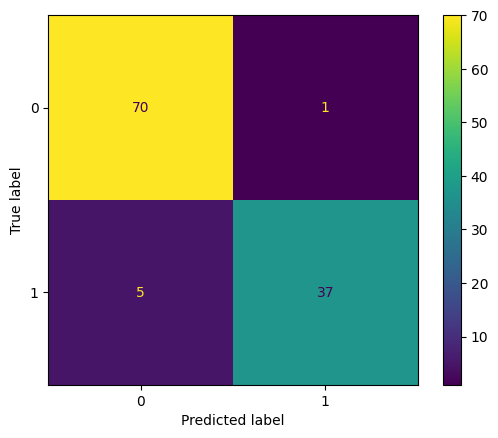

In [74]:
confusion(dt10)

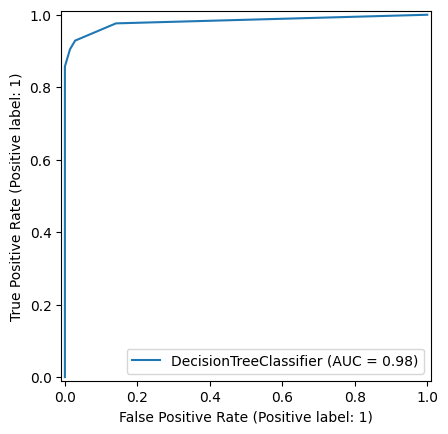

In [88]:
roc_curv(dt10)

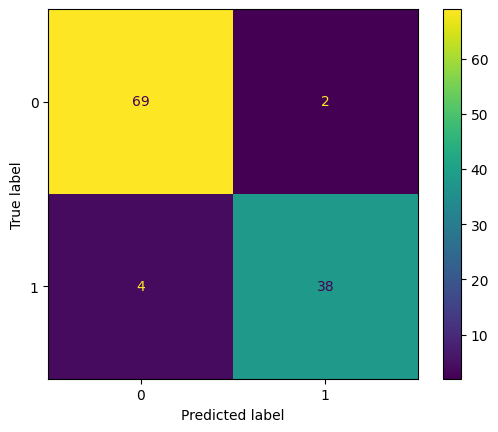

In [75]:
confusion(nb4)

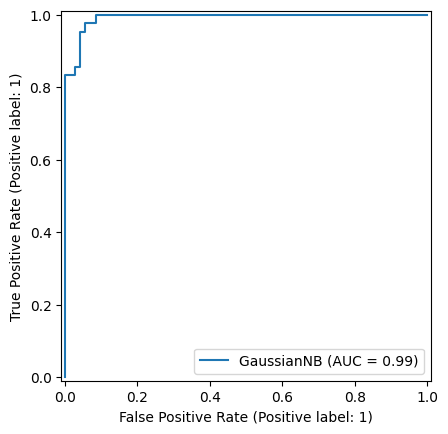

In [89]:
roc_curv(nb4)

For å bedre visualisere hvordan modellene prestere så har jeg også tegnet opp et confution matix og en roc_corv for både dt10 og nb4, imidlertid er det viktig å påpeke at disse kun representere en kjøring av modellene med fordeling av datasette og vil derfor ikke være nødvendigvis være representative for de øverige resultatene for modellene som har blitt kjører flere ganger for mer pålitelige resultater.

Hvis vi ser på cunfution matix for "dt10", så ser vi at modellen predikere 70 riktige "negative" verdier og 37 riktige "positive" verdier, vi ser også at modellen predikere 5 falske "negative" verider eller ikke "oppdager" 5 "positive" verdier. For de negative verdiere et det kun 1 som ikke oppdager eller kun et falskt "positivt" resultat. 

For "nb4" så ser vi at modellen predikere 69 riktige "negative" verdier, 38 riktige "positive" verdier, 4 falaske "negative verdier og 2 falske "positive" verdier.

Når vi ser på roc curven så det den blå linjen som indikere roc verdiene og roc_auc_score er da en representasjon av arealet under denne curven. Når vi sammenligner roc curven for dt10 og nb4 så ser det utsom nb4 ligger noe tetter opptild et optimale resultatet for kurven.